In [10]:
import pandas as pd
import json
import datetime
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df_final = pd.DataFrame()

In [12]:
def my_avg(dfcol):
    return (dfcol.iloc[0]+dfcol.iloc[1])/2

In [13]:
for i in range(2008,2022):
    file = open("data/winter_"+str(i)+"-"+str(i+1)+".json","r")
    data = json.load(file)
    df = pd.json_normalize(data['results'])
    df = df.query('datatype in ["TMAX", "TMIN"]')
    df1 = df.groupby('datatype').get_group("TMAX")[["date","value"]].set_index("date")
    df2 = df.groupby('datatype').get_group("TMIN")[["date","value"]].set_index("date")
    df_filtered = pd.concat([df1,df2],axis=1)
    df_average = pd.DataFrame(df_filtered.apply(my_avg,axis=1))
    df_average.columns = [str(i)+"-"+str(i+1)]
    l=[]
    for i in range(len(df_average.index)):
        s = df_average.index[i]
        dt = datetime.datetime.fromisoformat(s)
        l.append(dt.strftime("%m-%d"))
    df_average.index=l
    df_final = pd.concat([df_final,df_average],axis=1)
    file.close()

In [14]:
df_final

,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
12-15,-8.5,37.5,38.5,30.0,36.0,NaN,30.0,18.5,34.5,42.5,41.5,24.0,20.0,36.5
12-16,13.0,42.5,26.0,27.0,32.0,NaN,23.0,19.5,27.0,39.5,42.5,24.0,29.0,34.0
12-17,25.5,38.5,24.5,29.0,36.5,NaN,29.5,10.0,-6.0,31.5,42.5,28.5,34.0,27.5
12-18,16.5,30.0,25.5,41.5,33.5,NaN,33.0,29.5,3.5,37.0,41.0,42.0,28.0,24.5
12-19,29.0,32.5,38.0,29.5,15.5,NaN,34.0,38.0,23.5,38.0,39.0,32.0,30.0,44.0
12-20,15.5,38.0,36.5,29.5,28.0,NaN,35.0,37.0,41.5,47.5,33.5,35.5,33.0,42.5
12-21,9.5,45.5,27.5,30.0,38.5,NaN,39.0,35.0,39.5,20.5,43.5,47.0,45.5,43.0
12-22,15.0,36.0,27.5,15.0,40.0,NaN,31.0,37.0,30.5,25.5,26.5,51.5,45.5,46.5
12-23,19.0,20.0,34.0,21.5,40.0,NaN,26.5,29.0,36.5,24.0,31.5,49.5,21.5,47.0
12-24,27.0,12.0,31.5,24.0,25.0,NaN,34.0,25.0,40.5,10.0,33.5,42.0,35.5,40.5


In [15]:
df_final.to_csv('data/all_data_avg.csv')

In [16]:
df_final = df_final.fillna(0)

In [17]:
df_final

,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
12-15,-8.5,37.5,38.5,30.0,36.0,0.0,30.0,18.5,34.5,42.5,41.5,24.0,20.0,36.5
12-16,13.0,42.5,26.0,27.0,32.0,0.0,23.0,19.5,27.0,39.5,42.5,24.0,29.0,34.0
12-17,25.5,38.5,24.5,29.0,36.5,0.0,29.5,10.0,-6.0,31.5,42.5,28.5,34.0,27.5
12-18,16.5,30.0,25.5,41.5,33.5,0.0,33.0,29.5,3.5,37.0,41.0,42.0,28.0,24.5
12-19,29.0,32.5,38.0,29.5,15.5,0.0,34.0,38.0,23.5,38.0,39.0,32.0,30.0,44.0
12-20,15.5,38.0,36.5,29.5,28.0,0.0,35.0,37.0,41.5,47.5,33.5,35.5,33.0,42.5
12-21,9.5,45.5,27.5,30.0,38.5,0.0,39.0,35.0,39.5,20.5,43.5,47.0,45.5,43.0
12-22,15.0,36.0,27.5,15.0,40.0,0.0,31.0,37.0,30.5,25.5,26.5,51.5,45.5,46.5
12-23,19.0,20.0,34.0,21.5,40.0,0.0,26.5,29.0,36.5,24.0,31.5,49.5,21.5,47.0
12-24,27.0,12.0,31.5,24.0,25.0,0.0,34.0,25.0,40.5,10.0,33.5,42.0,35.5,40.5


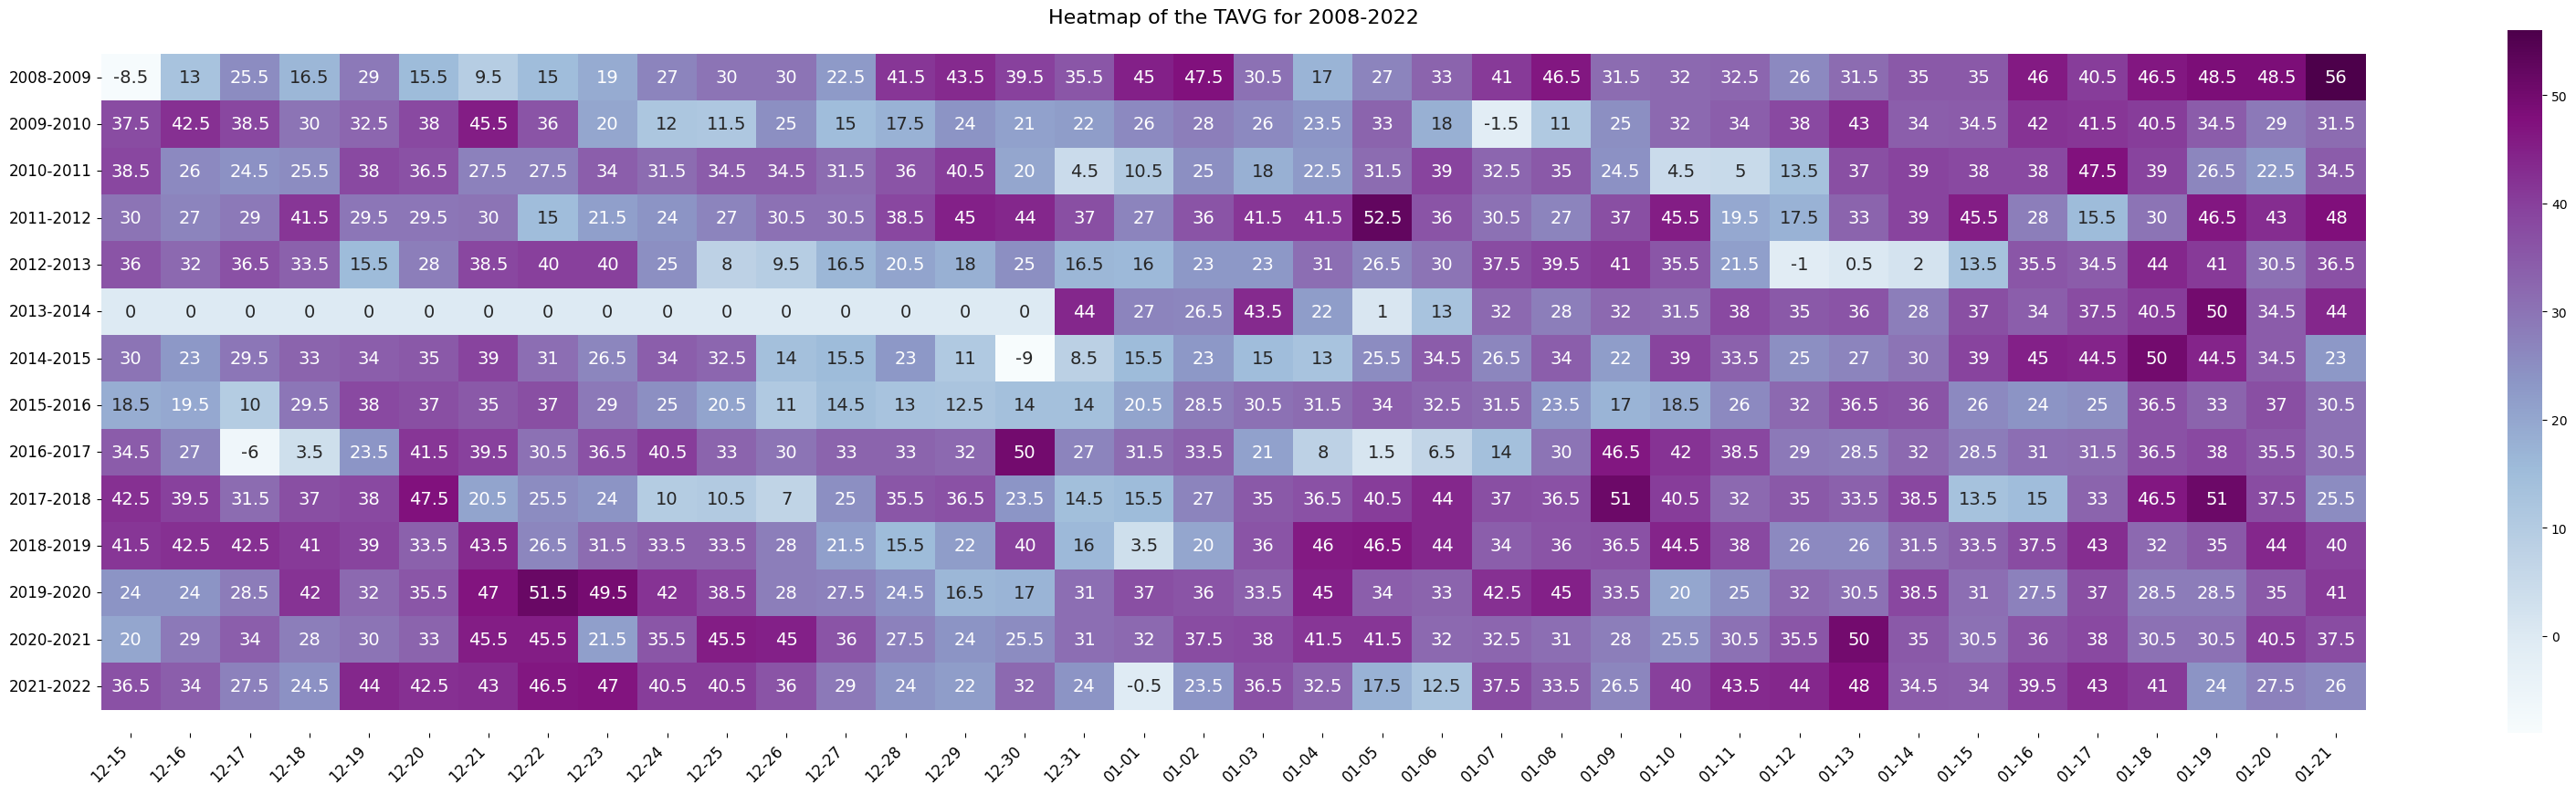

In [18]:
plt.figure(figsize=(40, 10))
ax = sns.heatmap(df_final.transpose(), annot=True, fmt='g', cmap='BuPu', annot_kws={'fontsize': 14})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(label="Heatmap of the TAVG for 2008-2022", fontsize=16)
plt.ylabel("")
plt.yticks(np.arange(len(df_final.columns))+0.5,df_final.columns,fontsize=12,rotation=0)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.savefig('Heatmap.jpg')